# Predicting the Survival of Titanic Passengers

<img src="./images/rms-titanic.jpeg" />

## Summary
The goal of this notebook is to 1) explore the dataset from [Kaggle's Titanic machine learning competition](https://www.kaggle.com/c/titanic/) and create a trained machine learning model, and 2) create a web application where the model will be used to make predictions about a user's passenger profile.
***
## Background
From [Wikipedia](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic):
> RMS Titanic sank in the early morning of 15 April 1912 in the North Atlantic Ocean, four days into the ship's maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time) on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime marine disasters in history.


From [Kaggle](https://www.kaggle.com/c/titanic):
> The sinking of the Titanic is one of the most infamous shipwrecks in history.
>
> On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
>
> While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
***
## Part I: Explore the Data and Create a Machine Learning Model
#### Import dependencies

In [1]:
# data visualization
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# linear algebra
import numpy as np

# data processing
import pandas as pd

# algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# serializing
import pickle

***
#### Import the dataset

In [2]:
# import training data
train = pd.read_csv('./input/train.csv')

# # import test data
# test = pd.read_csv('./input/test.csv')

***
#### Explore the dataset

In [3]:
list(train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<table align="left">
    <tr>
        <td style="font-weight: bold; text-align: left;">PassengerId</td>
        <td style="text-align: left;">Unique ID</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">Survived</td>
        <td style="text-align: left;">Survival status</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">Pclass</td>
        <td style="text-align: left;">Ticket class</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">Name</td>
        <td style="text-align: left;">Name</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">Sex</td>
        <td style="text-align: left;">Genger</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">Age</td>
        <td style="text-align: left;">Age in years</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">SibSp</td>
        <td style="text-align: left;">Number of siblings or spouses aboard the Titanic</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">Parch</td>
        <td style="text-align: left;">Number of parents or children aboard the Titanic</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">Ticket</td>
        <td style="text-align: left;">Ticket number</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">Fare</td>
        <td style="text-align: left;">Price paid</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">Cabin</td>
        <td style="text-align: left;">Cabin number</td>
    </tr>
    <tr>
        <td style="font-weight: bold; text-align: left;">Embarked</td>
        <td style="text-align: left;">Port of embarkation</td>
    </tr>
</table>

***
#### Summarize the dataframe

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training dataset has **891 examples** and **11 features** plus the **1 target variable** 'Survived'.
* 5 of the features are objects
* 4 of the features plus the 1 target variable are integers
* 2 of the features are floats

***
#### Generate descriptive statistics

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that 38% of the training set survived the Titanic. This is roughly inline with the actual survival rate of 32%.

We can also make other other early observations such as the 'Age' feature's values range from 0.4 (ages less than 1 are represented as a fractional value in the dataset) to 80, the 'Fare' feature's maximum value is \\$512.33 but the average value is only \\$32.20 (and the 75th percentile value is only \\$31.00). In addition there are 177 fewer values for the 'Age' feature than there are any other feature, so we can already identify that the dataset contains missing values that we will need to deal with.

***
#### Preview the dataframe

In [6]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Most machine learning algorithms require numerical input and output variables. (This limitation may not be strictly enforced by the machine learning algorithms themselves, but is generally a more efficient implementation of the algorithms.)

From this preview table we can see that we will need to convert several categorical features into numeric values (e.g. 'Embarked', 'Sex', 'Pclass'). We can also observe several features contain continuous data with a wide range of values (e.g. 'Age', 'Fare') that we'll want to transform into binned categorical data to equalize their importance. Furthermore, we can detect additional features that contain missing values (e.g. 'Cabin') which we will also need to need to deal with.

Let's figure out which features contain missing data.

***
#### Calculate missing values for each feature

In [7]:
# calculate the sum of missing values for each column
total = train.isnull().sum().sort_values(ascending=False)

# calculate the percentage of missing values for each column
percent = round((train.isnull().sum() / train.isnull().count() * 100), 1).sort_values(ascending=False)

# create a new dataframe
missing_data = pd.concat([total, percent], axis=1, keys=['# Missing', '% Missing'])

# preview the dataframe
missing_data.head(12)

,# Missing,% Missing
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


* The 'Embarked' feature has 2 missing values, 0.2% of the total examples.
    - We can drop those entries without having a significant impact on our model's accuracy to predict results.


* The 'Age' feature has 177 missing values, 19.9% of the total examples.
    - We will transform this feature by binning the continues values into defined cohorts, including a 'missing' cohort, of categorical values.


* The 'Cabin' feature has 687 missing values, _**77.7%**_ of the total examples.
    - We will need to take a closer look at this feature to determine if it's possible to use this feature.

***
## Feature selection

Let's review our feature set to understand how each feature impacts survival. The goal is to determine which features we should include in our machine learning model and which features we can drop. In some cases we'll need to preprocess the feature data to better understand its meaning before deciding how to proceed. (We'll also do more preprocessing before fitting the data to our model.)

We'll generate some quick statistics and a plot simple bar chart to visualize the relationship between each feature and our target variable 'Survival'. We can use the [seaborn](https://seaborn.pydata.org/index.html) library (a data visualization library based on [matplotlib](https://matplotlib.org/) used for creating informative statistical graphics) to generate these charts.

***
#### Embarked

We'll start with the 'Embarked' feature because we want to drop the 2 rows with missing data before doing anything else.

In [8]:
# recreate the dataframe after dropping rows with null 'Embarked' values
train = train[pd.notnull(train['Embarked'])]

# preview the updated dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Previewing the dataframe doesn't verify that the rows with missing 'Embarked' values have been dropped, but we can do a quick calculations to confirm.

In [9]:
# calculate the sum of missing values in the 'Embarked' column
total = train['Embarked'].isnull().sum()

# count the number of rows in the 'Embarked' column
count = train['Embarked'].isnull().count()

# calculate the percentage of missing values for the 'Embarked' column
percent = round((total / count * 100), 1)

# create a new dataframe
missing_data = pd.DataFrame([[total, percent]], columns=['# Missing', '% Missing'], index =['Embarked'])

# preview the dataframe
missing_data.head()

,# Missing,% Missing
Embarked,0,0.0


In [10]:
# describe the data
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
# count the unique values
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

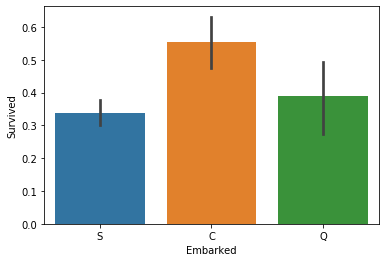

In [12]:
# plot the feature data as a bar chart
sns.barplot(x="Embarked", y="Survived", data=train)

Before moving on to the next feature let's convert the 'Embarked' feature values to lowercase

In [13]:
# convert strings in the series to lowercase
train['Embarked'] = train['Embarked'].str.lower()

# count the unique values
train['Embarked'].value_counts()

s    644
c    168
q     77
Name: Embarked, dtype: int64

***
#### Cabin

Next let's take a look at the 'Cabin' feature and see what to do about its missing values.

In [14]:
train['Cabin'].describe()

count         202
unique        146
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [15]:
train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
E101           3
              ..
E36            1
E49            1
E10            1
B80            1
D15            1
Name: Cabin, Length: 146, dtype: int64

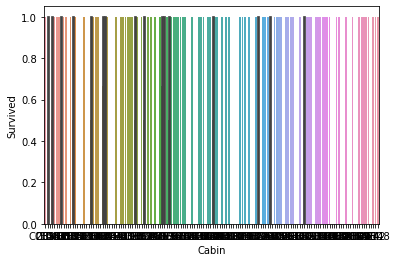

In [16]:
sns.barplot(x="Cabin", y="Survived", data=train)

Given the number of missing values, number of unique values and the categorical nature of this feature we could be tempted to drop it from our dataset. However, if we take a closer look at the data we see that there is a letter in each cabin (e.g. "C123") that corresponds to a deck on the titanic. If we review a cutaway diagram of the tianic (see below) it would be interesting to see whether or not deck location has an impact on survival.

<img src="./images/titanic-cutaway-diagram.png" align="left" style="border: 1px solid #000; display: block; padding: 10px; width: 40%;" />

Let's extract the deck identifier from the 'Cabin' feature and use this value to create a new feature we'll call 'Deck'.

In [17]:
# create a new 'Deck' column in our dataframe using regex to extract the first letter from the 'Cabin' column
train['Deck'] = train.Cabin.str.extract("([a-zA-Z]+)", expand=False).str.lower()

# replace null values in the 'Deck' column
train['Deck'] = train['Deck'].fillna("unavailable")

# preview the updated dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,s,unavailable
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,c,c
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,s,unavailable
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,s,c
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,s,unavailable


In [18]:
train['Deck'].describe()

count             889
unique              9
top       unavailable
freq              687
Name: Deck, dtype: object

In [19]:
train['Deck'].value_counts()

unavailable    687
c               59
b               45
d               33
e               32
a               15
f               13
g                4
t                1
Name: Deck, dtype: int64

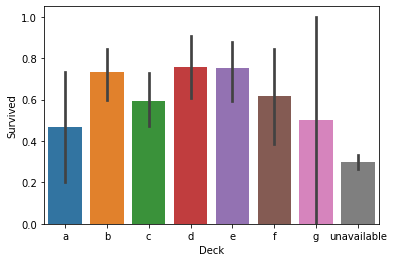

In [20]:
sns.barplot(x="Deck", y="Survived", data=train, order=["a", "b", "c", "d", "e", "f", "g", "unavailable"])

This looks much better and is something we can use. Let's go ahead and drop the old 'Cabin' feature from our dataset.

In [21]:
# drop the 'Cabin' column from the dataframe
train = train.drop(columns=['Cabin'])

# preview the updated dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,unavailable
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,c
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,unavailable
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,s,c
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,s,unavailable


***
#### Age

While we're dealing with missing values let's take a look at the 'Age' feature next.

In [ ]:
train['Age'].describe()

In [ ]:
train['Age'].value_counts()

In [ ]:
sns.barplot(x="Age", y="Survived", data=train)

We see a similar issue with the 'Age' feature that we saw with the 'Cabin' feature; a significant number of missing values and unique values. In addition, as our bar chart illustrates, there is a wide range of values that are unequally distributed. We'll also need deal with the missing values. We can solve all these problems by binning the continuous values, including the missing values, from the 'Age' feature and create a new feature we'll call 'AgeCategory'

In [ ]:
# define bins and labels
bin_ranges = [-1, 0, 12, 20, 30, 45, 60, 80]
range_labels = ["missing", "child", "teenager", "young_adult", "adult", "middle_age", "senior"]

# replace NaN values with negative number between 0 and -1
train["Age"] = train["Age"].fillna(-0.5)
    
# convert values from float to int
train['Age'] = train['Age'].astype(int)
    
# segment and sort values into labeled bins
train["AgeCategories"] = pd.cut(train["Age"], bin_ranges, labels=range_labels)

# preview the updated dataframe
train.head()

In [ ]:
train['AgeCategories'].describe()

In [ ]:
train['AgeCategories'].value_counts()

In [ ]:
sns.barplot(x="AgeCategories", y="Survived", data=train)

This is a big improvement. It might be nice if our bins were more equal, but I think the age ranges we defined for our bins make sense in the context of a person's age. Now that we have our new categorical feature we can drop the existing 'Age' feature from our dataset.

In [ ]:
# drop the 'Age' column from the dataframe
train = train.drop(columns=['Age'])

# preview the updated dataframe
train.head()

***
#### Fare

While we're converting continuous values into binned categorical values we should go ahead and look at the 'Fare' feature next.

In [ ]:
train['Fare'].describe()

In [ ]:
train['Fare'].value_counts()

In [ ]:
sns.barplot(x="Fare", y="Survived", data=train)

The bad news is that it looks like our 'Fare' data has some similar issues that our 'Age' data had; a wide range of values that are unequally distributed and a significant number of unique values. The good news is that because the 'Fare' data is similar to the 'Age' data we can give this feature a similar transformation without too much effort.

In [ ]:
# define bins and labels
bin_ranges = [-1, 0, 7, 14, 35, 70, 140, 525]
range_labels = ["Missing", "0", "1", "2", "3", "4", "5"]

# replace NaN values with negative number between 0 and -1
train["Fare"] = train["Fare"].fillna(-0.5)
    
# convert values from float to int
train['Fare'] = train['Fare'].astype(int)
    
# segment and sort values into labeled bins
train["FareCategories"] = pd.cut(train["Fare"], bin_ranges, labels=range_labels)

# preview the updated dataframe
train.head()

In [ ]:
train['FareCategories'].describe()

In [ ]:
train['FareCategories'].value_counts()

In [ ]:
sns.barplot(x="FareCategories", y="Survived", data=train)

Another big improvement, and another situation where it might be nice if our bins were more equal, but again I think the ranges we defined for our bins make sense given the context. Let's drop the existing 'Fare' feature from our dataset.

In [ ]:
# drop the 'Fare' column from the dataframe
train = train.drop(columns=['Fare'])

# preview the updated dataframe
train.head()

***
#### Name

Let's continue working with the features that need some extra work and take a look at the 'Name' feature next.

In [ ]:
train['Name'].describe()

In [ ]:
train['Name'].value_counts()

In [ ]:
sns.barplot(x="Name", y="Survived", data=train)

Given that every name in our dataset is unique it's tempting to conclude that we should just drop this feature from our dataset, however it looks like every name includes a title. Let's see what the data looks like if we isolate that substring and create a new feature called 'Title'.

In [ ]:
# create a new 'Title' column in our dataframe using regex to extract the title from the 'Name' column
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.', expand=False).str.lower()

# preview the updated dataframe
train.head()

In [ ]:
train['Title'].describe()

In [ ]:
train['Title'].value_counts()

In [ ]:
sns.barplot(x="Title", y="Survived", data=train)

This is looking much better, but since 'Mr', 'Miss', 'Mrs' and 'Master' comprise a majority of the values in this feature we can reduce the others into an 'Other' category.

In [ ]:
# replace values if matched with a value in a list of defined values to be replaced
train['Title'] = train['Title'].replace(['dr', 'rev', 'mlle', 'major', 'col', 'don', 'lady', 'sir', 'capt', 'ms', 'jonkheer', 'mme', 'countess'], 'other')

# count the unique values
train['Title'].value_counts()

In [ ]:
sns.barplot(x="Title", y="Survived", data=train)

This looks much better. We can now drop the existing 'Name' feature from our dataset.

In [ ]:
# drop the 'Name' column from the dataframe
train = train.drop(columns=['Name'])

# preview the updated dataframe
train.head()

***
#### SibSp and Parch

We still have two more features that we'll need to manipulate. We'll look at the 'SibSp' and 'Parch' features next.

In [ ]:
train['SibSp'].describe()

In [ ]:
train['SibSp'].value_counts()

In [ ]:
sns.barplot(x="SibSp", y="Survived", data=train)

In [ ]:
train['Parch'].describe()

In [ ]:
train['Parch'].value_counts()

In [ ]:
sns.barplot(x="Parch", y="Survived", data=train)

At first glance these features seem like they would work without adjustment at this time, but I already know that I'll want to simplify the corresponding form in our web app to ask a question like "are you traveling with any children?" as opposed to "how many children are you traveling with?" (i.e. Reduce this to a binary true / false question.)

Let's create two new features that indicate whether or not a passenger is traveling with 1 or more siblings / spouse and 1 or more children / parents.

In [ ]:
# reduce the 'SibSp' feature to 1 or 0
def sibsp(row):
    if row['SibSp'] == 0:
        val = 0
    else:
        val = 1
    return val

# reduce the 'Parch' feature to 1 or 0
def parch(row):
    if row['Parch'] == 0:
        val = 0
    else:
        val = 1
    return val

In [ ]:
# apply a function along an axis of a DataFrame
train['SiblingSpouse'] = train.apply(sibsp, axis=1)
train['ParentChild'] = train.apply(parch, axis=1)
train.head(10)

In [ ]:
train['SiblingSpouse'].describe()

In [ ]:
train['SiblingSpouse'].value_counts()

In [ ]:
sns.barplot(x="SiblingSpouse", y="Survived", data=train)

In [ ]:
train['ParentChild'].describe()

In [ ]:
train['ParentChild'].value_counts()

In [ ]:
sns.barplot(x="ParentChild", y="Survived", data=train)

This looks great and the correlation between traveling with someone and survival is clear. Let's drop the existing 'SibSp' and 'Parch' features from our dataset.

In [ ]:
# drop the 'SibSp' and 'Parch' columns from the dataframe
train = train.drop(columns=['SibSp', 'Parch'])

# preview the updated dataframe
train.head()

***
#### Sex and Pclass

Now that we've finished working with the features that needed some extra effort let's move on to the 'Sex' and 'Pclass fetures.

In [ ]:
train['Sex'].describe()

In [ ]:
train['Sex'].value_counts()

In [ ]:
sns.barplot(x="Sex", y="Survived", data=train)

In [ ]:
train['Pclass'].describe()

In [ ]:
train['Pclass'].value_counts()

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=train)

These features look great as-is. We don't need to do anything else with them at this time. Let's move on to our final two features.

***
#### Ticket and PassengerId

In [ ]:
train['Ticket'].describe()

In [ ]:
train['Ticket'].value_counts()

In [ ]:
sns.barplot(x="Ticket", y="Survived", data=train)

Looks like a familiar problem we've seen before. Out of 889 records there are 680 unique values. After reviewing the dataset one more time I'm not seeing any meaningful pattern in the values used for the 'Ticket' feature. Given these limitations we will drop this column.

In [ ]:
# drop the 'Ticket' column from the dataframe
train = train.drop(columns=['Ticket'])

# preview the updated dataframe
train.head()

In [ ]:
train['PassengerId'].describe()

In [ ]:
train['PassengerId'].value_counts()

In [ ]:
sns.barplot(x="PassengerId", y="Survived", data=train)

We can drop the 'PassengerId' feature as it is irrelevant to our target variable 'survival'.

In [ ]:
# drop the 'PassengerId' column from the dataframe
train = train.drop(columns=['PassengerId'])

# preview the updated dataframe
train.head()

After exploring our data and engineering some new features we're ready to move on and preprocess our data.

***
## Data preprocessing

Before doing anything else, let's pause to summarize our updated dataset.

In [ ]:
# print a summary of the dataframe
train.info()

The dataset has **889 examples** (2 fewer than before after we dropped the rows with missing 'Embarked' values) and **9 features** plus the **1 target variable**, 'Survived'.

* 4 of the features are integers
* 4 of the features are objects
* 2 of the features are categories

Before we feed the dataset into our machine learning models we need to transform categorical values into numerical values because many models do not work with textual values.

There are a number of strategies to handle categorical features. We're going to use the "one hot encoding" method which will accomplish two things for us:

1. Transfrom the dataset's textual values into numerical values
2. Ensure the transformed values are equally important

In some cases, when textual values are encoded to numerical values, some values will be greater than the other values. This can imply that those values are of higher importance than the others, which can result in inacurate predictions.

The one hot encoding technique essentially creates a "dummy" feature for each distinct value in a categorical feature. Once the dummy values are created a boolean value (0 or 1) is populated to indicate whether the value is true or false for the feature.

The pandas library has a built-in function called get_dummies() that does exactly this.

In [ ]:
# rename column headers
train = train.rename(columns={
    "Survived": "survived",
    "Pclass": "passenger_class",
    "Sex": "gender",
    "Embarked": "embarked",
    "Deck": "deck",
    "AgeCategories": "age_categories",
    "FareCategories": "fare_categories",
    "Title": "title",
    "SiblingSpouse": "sibling_or_spouse",
    "ParentChild": "parent_or_child",
})

# convert categorical variable into dummy variables
train = pd.get_dummies(train.astype(str), columns=["passenger_class", "gender", "sibling_or_spouse", "parent_or_child", "embarked", "deck", "age_categories", "fare_categories", "title",])

# cast all values in the dataframe as integers
train = train.astype(int) 

# preview the updated dataframe
train.head()

Let's pause one last time to summarize our dataset to see what it looks like before moving on.

In [ ]:
# print a summary of the dataframe
train.info()

We still have **889 examples**, all integers, but after one hot encoding our dataset we now have **40 features** plus the **1 target variable** 'Survived'.

Out dataset is now ready to be used in our machine learning models.

***
## Fit models and make predictions

In [ ]:
feature_set = [
    'passenger_class_1',
    'passenger_class_2',
    'passenger_class_3',
    'gender_female',
    'gender_male',
    'sibling_or_spouse_0',
    'sibling_or_spouse_1',
    'parent_or_child_0',
    'parent_or_child_1',
    'embarked_c',
    'embarked_q',
    'embarked_s',
    'deck_a',
    'deck_b',
    'deck_c',
    'deck_d',
    'deck_e',
    'deck_f',
    'deck_g',
    'deck_t',
    'deck_unavailable',
    'age_categories_adult',
    'age_categories_child',
    'age_categories_middle_age',
    'age_categories_missing',
    'age_categories_senior',
    'age_categories_teenager',
    'age_categories_young_adult',
    'fare_categories_0',
    'fare_categories_1',
    'fare_categories_2',
    'fare_categories_3',
    'fare_categories_4',
    'fare_categories_5',
    'fare_categories_Missing',
    'title_master',
    'title_miss',
    'title_mr',
    'title_mrs',
    'title_other'
]

X = train[feature_set]
y = train['survived']

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

***
### Logistic Regression

In [ ]:
lr = LogisticRegression()

lr.fit(train_X, train_y)

lr_predictions = lr.predict(test_X)
lr_predictions

***
### Stochastic Gradient Descent (SGD)

In [ ]:
sgd = SGDClassifier(max_iter=5, tol=None)

sgd.fit(train_X, train_y)

sgd_predictions = sgd.predict(test_X)
sgd_predictions

***
### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(train_X, train_y)

rf_predictions = rf.predict(test_X)
rf_predictions

***
### K Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(train_X, train_y)

knn_predictions = knn.predict(test_X)
knn_predictions

***
### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()

gnb.fit(train_X, train_y)

gnb_predictions = gnb.predict(test_X)
gnb_predictions

***
### Perceptron

In [ ]:
perceptron = Perceptron(max_iter=10)

perceptron.fit(train_X, train_y)

perceptron_predictions = perceptron.predict(test_X)
perceptron_predictions

***
### Linear Support Vector Machine

In [ ]:
linear_svc = LinearSVC()

linear_svc.fit(train_X, train_y)

linear_svc_predictions = linear_svc.predict(test_X)
linear_svc_predictions

***
### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(train_X, train_y)

dt_predictions = dt.predict(test_X)
dt_predictions

***
## Score models

In [ ]:
# Logistic Regression
lr_accuracy = accuracy_score(test_y, lr_predictions)

# Stochastic Gradient Descent (SGD)
sgd_accuracy = accuracy_score(test_y, sgd_predictions)

# Random Forest
rf_accuracy = accuracy_score(test_y, rf_predictions)

# K Nearest Neighbor
knn_accuracy = accuracy_score(test_y, knn_predictions)

# Gaussian Naive Bayes
gnb_accuracy = accuracy_score(test_y, gnb_predictions)

# Perceptron
perceptron_accuracy = accuracy_score(test_y, perceptron_predictions)

# Linear Support Vector Machine
linear_svc_accuracy = accuracy_score(test_y, linear_svc_predictions)

# Decision Tree
dt_accuracy = accuracy_score(test_y, dt_predictions)

# create new dataframe
results = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Stochastic Gradient Descent (SGD)',
              'Random Forest', 
              'K Nearest Neighbor',
              'Gaussian Naive Bayes',
              'Perceptron', 
              'Linear Support Vector Machine', 
              'Decision Tree'],
    'Score': [lr_accuracy,
              sgd_accuracy,
              rf_accuracy, 
              knn_accuracy,
              gnb_accuracy,
              perceptron_accuracy, 
              linear_svc_accuracy,
              dt_accuracy]
})

# sort results by 'Score'
result_df = results.sort_values(by='Score', ascending=False)

# preview the dataframe
result_df.head(8)

The Random Forest Classifier model scored best. Let's use K-Fold Cross Validation to randomly split the training data into *K* subsets (i.e. folds). This retruns a list of length *K* which we can use to calculate the mean (the central tendency of a given set of numbers) and standard deviation (measure of the amount of variation or dispersion of a set of values).

***
## K-Fold Cross Validation

In [ ]:
# evaluate a score by cross-validation
cross_validation = cross_val_score(rf, train_X, train_y, cv=10, scoring="accuracy")

# print the resulting list, calculated mean and calculated standard deviation
print("Cross Vzlidation:", cross_validation)
print("Mean: %", round(cross_validation.mean() * 100, 2))
print("Standard Deviation: %", round(cross_validation.std() * 100, 2))

Not much of an improvement in accuracy. Althought there are other things we could do to try and improve the accuracy of our model, let's call this good enough for now and move on to Part II of our project.


***
## Part II: Export Model

### Save the model (i.e. serialize a Python object)

In [ ]:
pickle_out = open('model.pickle', 'wb')
pickle.dump(rf, pickle_out)
pickle_out.close()

### Import the model (i.e. deserialize a Python object)

In [ ]:
pickle_in = open('model.pickle', 'rb')
model = pickle.load(pickle_in)

### Use the model to make predictions

In [ ]:
model.predict(test_X)

In [ ]:
test_X.values[1].tolist()

In [ ]:
# example user input converted into one hot encoded two-dimensional array
user_input = [test_X.values[1].tolist()]

# convert user_input into a new pandas data frame
data = pd.DataFrame(np.array(user_input))

data.head()

In [ ]:
model.predict(data)